# Data Visualization with Python

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from datetime import datetime

## Introduction

In this workshop, we will visualize the historical weather data for a single city. Pandas package will be used to process the data into desired format ready for visualization using Matplotlib.
#### data source: https://www.kaggle.com/selfishgene/historical-hourly-weather-data#humidity.csv

## Section one: basic line chart, area chart, and subplots in Matplotlib

### Step 1: Read csv file 

####  Read csv into pandas dataframe and get basic idea about data
such as print out the first few rows of data, get basic statistics features

In [2]:
temperature_df = pd.read_csv("../../../data/temperature.csv")
temperature_df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


### Step 2: Transform temperature data
The original dataframe puts 36 cities name as column name. We want to transform the dataframe, so it will have 3 columns, one is `datetime`, second column is `city` which captures all city names from original dataframe's column name, and last one is `temperature`, which captures the actual temperature data.

datetime | Vancouver | Portland|....  =>  datetime | city | temperature

**pandas.melt()**: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html

If you want to do anything with the latitude and longitude data, dataframe joinning is the way to go
<b>pandas.dataframe.merge()</b>: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

To transform date string into the datetime type:
<b>pandas.to_datetime()</b>: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
It is much easier to extract year, month, date, time from a datetime object.

To substitute each value in a Series with another value, use <b>map</b> function:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html

In [33]:
# transform column name into a column of city name
# city_name is a list of string, if you want to melt only some of the current columns, specify it in `value_vars` 
# temperature_data = pd.melt(temperature_df, id_vars=['datetime'],value_vars= city_name, var_name='City', value_name='temperature')
temperature_data = pd.melt(temperature_df, id_vars=['datetime'], var_name='City', value_name='temperature')
print('after melt')
temperature_data.head()

after melt


,datetime,City,temperature
0,2012-10-01 12:00:00,Vancouver,NaN
1,2012-10-01 13:00:00,Vancouver,284.630000
2,2012-10-01 14:00:00,Vancouver,284.629041
3,2012-10-01 15:00:00,Vancouver,284.626998
4,2012-10-01 16:00:00,Vancouver,284.624955


In [34]:
# remove empty row
temperature_data = temperature_data[temperature_data['temperature'].notna()]

# split date_time into two column for future aggregation
temperature_data.loc[:, 'datetime'] = pd.to_datetime(temperature_data['datetime'])
temperature_data.loc[:, 'date'] = temperature_data.loc[:, 'datetime'].map(lambda x: x.strftime("%Y-%m-%d"))
# if you want to aggregate monthly later, extrat the year and moth
# temperature_data.loc[:, 'year_month'] = temperature_data.loc[:, 'datetime'].map(lambda x: x.strftime("%Y-%m"))

In [35]:
temperature_data.head(5)

,datetime,City,temperature,date
1,2012-10-01 13:00:00,Vancouver,284.630000,2012-10-01
2,2012-10-01 14:00:00,Vancouver,284.629041,2012-10-01
3,2012-10-01 15:00:00,Vancouver,284.626998,2012-10-01
4,2012-10-01 16:00:00,Vancouver,284.624955,2012-10-01
5,2012-10-01 17:00:00,Vancouver,284.622911,2012-10-01


### Extra transformation
The temperature is in the Kelvin scale, we can transform it into Fahrenheit scale or Celsius scale for better interpretation.
The dataframe contains hourly measurements data. To easily visualize it, we can aggregate it into daily measurements (or monthly, yearly, based on your needs)

<b>pandas.dataframe.groupby()</b>: https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.groupby.html

Aggregate on top of each group by <b>DataFrameGroupBy.agg()</b>: https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html

**Pandas.Series.apply()**: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html


In [38]:
# transform temperature from Kelvin scale to Fahrenheit and Celsius scale
def k_to_f(temperature_in_k):
    return (temperature_in_k - 273.15) * 9/5 + 32
def k_to_c(temperature_in_k):
    return temperature_in_k - 273.15

# pandas.series.apply() will apply the customized temperature transformation function to each of the cell in the column
temperature_data.loc[:, 'F_temperature'] = temperature_data.loc[:, 'temperature'].apply(k_to_f)
temperature_data.loc[:, 'C_temperature'] = temperature_data.loc[:, 'temperature'].apply(k_to_c)
temperature_data.head()

,datetime,City,temperature,date,F_temperature,C_temperature
1,2012-10-01 13:00:00,Vancouver,284.630000,2012-10-01,52.664000,11.480000
2,2012-10-01 14:00:00,Vancouver,284.629041,2012-10-01,52.662274,11.479041
3,2012-10-01 15:00:00,Vancouver,284.626998,2012-10-01,52.658596,11.476998
4,2012-10-01 16:00:00,Vancouver,284.624955,2012-10-01,52.654918,11.474955
5,2012-10-01 17:00:00,Vancouver,284.622911,2012-10-01,52.651240,11.472911


In [53]:
## aggregate temperature by city and date to get daily average, min, max temperature
## method 1:
daily_temperature_df = temperature_data.groupby(by=['City','date']).agg({'F_temperature':['min','max','mean']})

In [54]:
## will get a multi-index column
daily_temperature_df.columns

MultiIndex(levels=[['F_temperature'], ['min', 'max', 'mean']],
           labels=[[0, 0, 0], [0, 1, 2]])

In [55]:
## return a flattern array
daily_temperature_df.columns.ravel()  

array([('F_temperature', 'min'), ('F_temperature', 'max'),
       ('F_temperature', 'mean')], dtype=object)

In [56]:
## an elegent way to rename the columns from multi-index column
daily_temperature_df.columns = ['_'.join(x) for x in daily_temperature_df.columns.ravel()] #ravel, merge two layer of multiindex into meaning name


In [ ]:
## Method 2: aggregate temperature by city and date to get daily average, min, max temperature
#daily_temperature_df = temperature_data.groupby(by=['City','date']).temperature.agg(['min','max','mean'])

In [57]:
daily_temperature_df.head()

F_temperature_min  F_temperature_max  \
City        date                                               
Albuquerque 2012-10-01          53.546000          54.894378   
            2012-10-02          55.037286          76.838000   
            2012-10-03          52.106000          78.350000   
            2012-10-04          55.292000          82.868000   
            2012-10-05          53.852000          80.708000   

                        F_temperature_mean  
City        date                            
Albuquerque 2012-10-01           54.187174  
            2012-10-02           61.919277  
            2012-10-03           64.499750  
            2012-10-04           67.903250  
            2012-10-05           67.422500

In [58]:
# reset_index() to make the index into column
daily_temperature_df = daily_temperature_df.reset_index()
daily_temperature_df.head()

,City,date,F_temperature_min,F_temperature_max,F_temperature_mean
0,Albuquerque,2012-10-01,53.546000,54.894378,54.187174
1,Albuquerque,2012-10-02,55.037286,76.838000,61.919277
2,Albuquerque,2012-10-03,52.106000,78.350000,64.499750
3,Albuquerque,2012-10-04,55.292000,82.868000,67.903250
4,Albuquerque,2012-10-05,53.852000,80.708000,67.422500


## Step 3: Visualize Temeprature Data by Matplotlib

In [68]:
## temperature of one city: Vancouver
daily_temperature_vancouver_df = daily_temperature_df[daily_temperature_df['City']=='Vancouver']
daily_temperature_vancouver_df.shape

(1854, 5)

### A simple Line Chart (daily average of one city's temperature)

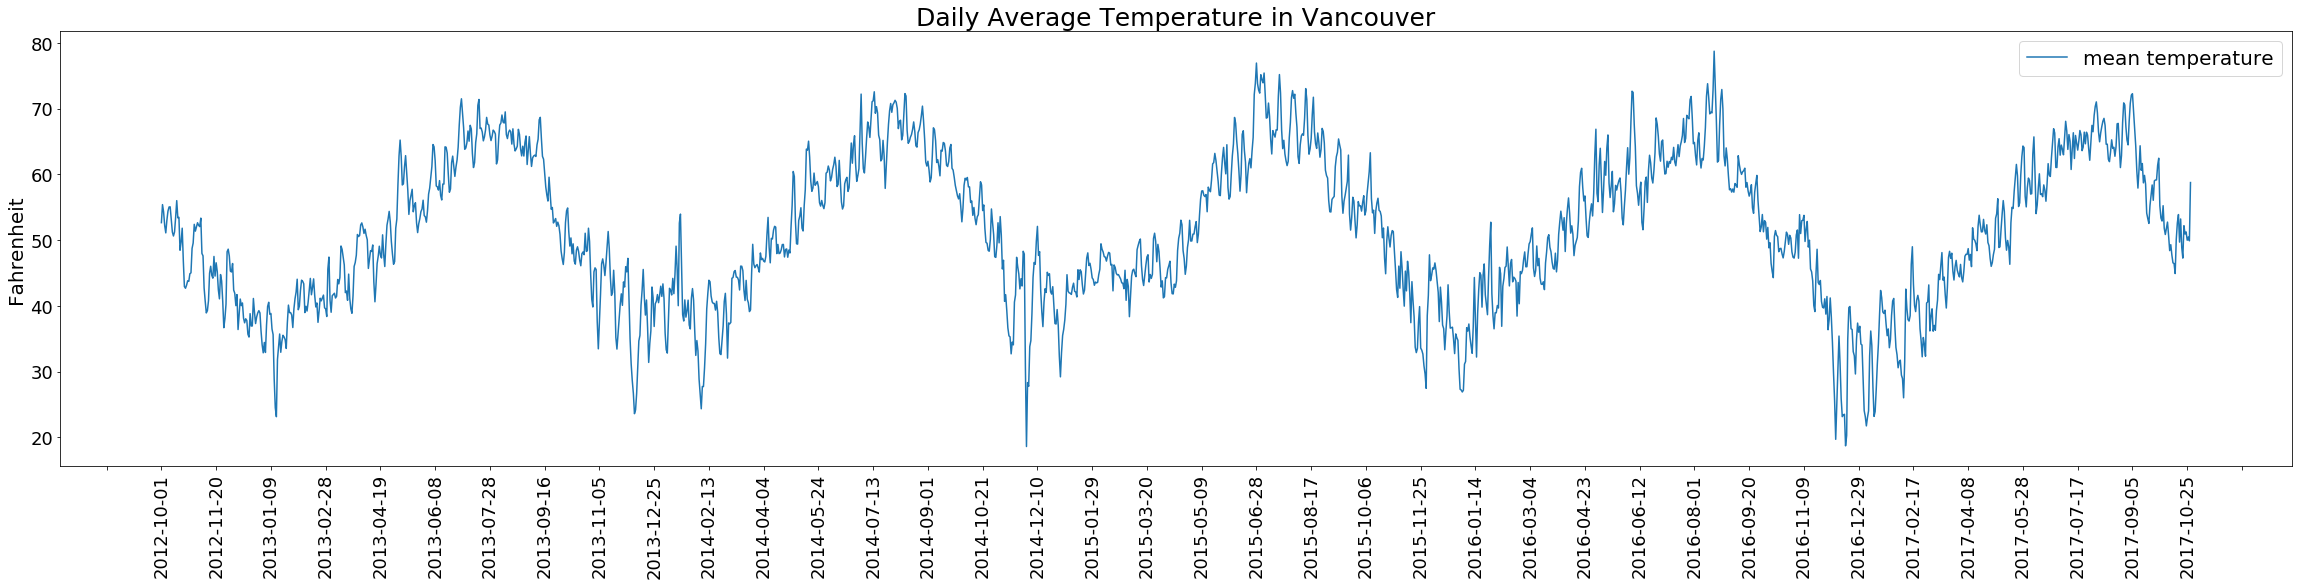

In [65]:
## visualize daily average of Vancouver's temperature
# create a figure and a set of subplots, since we dont say number of col and rows, only one subplot is created
# able to control color, edge type, etc
# ax: represent axes, fig: figure
fig, ax = plt.subplots(figsize = (40,8))

# matplotlib.pyplot.plot function, to create line chart
plt.plot(daily_temperature_vancouver_df['date'],daily_temperature_vancouver_df['F_temperature_mean'], label='mean temperature')

# control how may xticks labels you want to show. ticker is imported from Matplotlib
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))  # show x ticks label every 50 data point, so roughly 1854/50 = 37~38

# modify attributes of ticks, like label size, angle, color, etc
ax.tick_params(axis='both',labelsize=18)

# can control xaxis ticks and yaxis ticks seperately if you want
#ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', rotation=90)

# adding axis labels
# plt.xlabel("date", fontsize=20)
plt.ylabel("Fahrenheit", fontsize=20)

plt.legend(fontsize=20)
plt.title("Daily Average Temperature in Vancouver", fontsize=25)
plt.show()

### A Line chart on top of an Area Chart (daily average and range of one city's temperature)

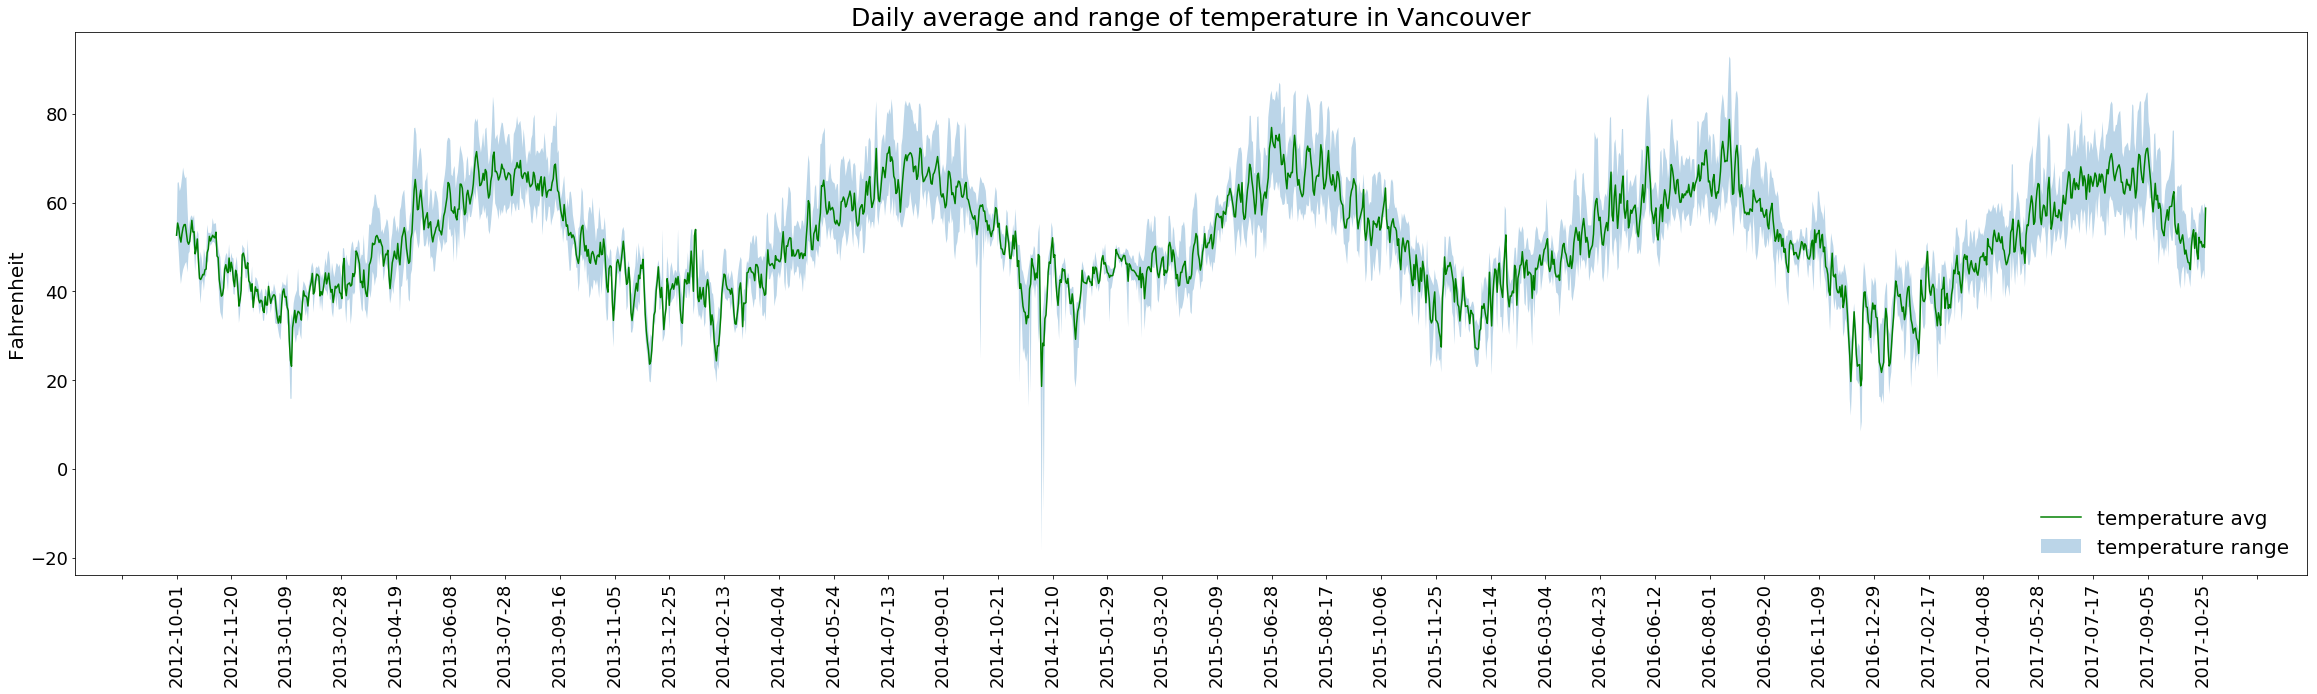

In [66]:
## visualize daily range and average of Vancouver's temperature
fig, ax = plt.subplots(figsize = (40,10))

# create the area chart by matplotlib.pyplot.fill_between(), given x, y0, y1
plt.fill_between(daily_temperature_vancouver_df['date'], daily_temperature_vancouver_df['F_temperature_min'], daily_temperature_vancouver_df['F_temperature_max'], alpha=0.3, label='temperature range')

# able to overlap different chart in one figure
plt.plot(daily_temperature_vancouver_df['date'], daily_temperature_vancouver_df['F_temperature_mean'],c='green', label='temperature avg')
ax.xaxis.set_major_locator(ticker.MultipleLocator(50)) 
ax.tick_params(axis='both',labelsize=18)
ax.tick_params(axis='x',rotation=90)
plt.ylabel("Fahrenheit", fontsize=20)

# able to control the parameters of legend
plt.legend(fontsize=20, frameon=False, loc='lower right')
plt.title('Daily average and range of temperature in Vancouver', fontsize=25)
plt.show()